# US015

# Introdução
Nesta US pretende-se estimar qual vai ser o custo mensal do a ser pago pelo empresa, relativamente ao consumo de água num novo parque, que terá 55 hectares. 

Para este estudo serão utilizados dois ficheiros. O primeiro "water_consumption_updated", o qual contém dados diários relativos ao consumo de água dos parques e o segundo "Area.csv", o qual contém o nome de cada parque, associado à sua respetiva área (em hectares). O estudo vai ser feito a partir de um Modelo de Regressão Linear, sendo a área do parque considerada como variável independente e o custo médio mensal, relativo ao consumo de água, como varíavel dependente. Este modelo irá permitir-nos fazer uma previsão relativa aos custos do novo parque, tal como encontrar uma relação entre a dimensão dos parques e os seus custos associados.

Inicialmente, será necessário estudar a viabilidade do ajuste linear, verificando se os dados existentes suportam uma relação linear entre a área dos parques e o custo de água. Isto envolve a análise preliminar dos dados, a construção do modelo de regressão linear, e a avaliação da sua precisão e confiabilidade.



## Regressão Linear Simples
A regressão linear simples é uma técnica estatística usada para modelar a relação entre duas variáveis quantitativas: uma variável independente (ou explicativa) **X**  e uma variável dependente (ou resposta) **Y**. O objetivo é encontrar a melhor linha reta que descreva a relação entre essas duas variáveis.



## Modelo de Regressão Linear Simples
O modelo de regressão linear simples pode ser representado pela equação:

\begin{document}

\[
Y = \beta_0 + \beta_1 X + \epsilon
\]

\end{document}

Onde:
**Y** é a variável dependente.
**X** é a variável independente.
**β0** e **β1** são os coeficientes de regressão
​ε é o termo de erro, que captura a diferença entre os valores observados e os valores preditos pelo modelo.

O coeficiente de correlação amostral de Pearson e coeficiente de determinação, **r**, é uma medida da direção e grau com que duas variáveis, se associam linearmente. 

\begin{document}

\[
r = \frac{S_{xy}}{\sqrt{S_{xx} \times S_{yy}}}
\]

\end{document}

\begin{document}

\[
S_{xx} = \sum_{i=1}^{n} (x_i - \bar{x})^2, \quad S_{yy} = \sum_{i=1}^{n} (y_i - \bar{y})^2 \quad \text{e} \quad S_{xy} = \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}).
\]

\end{document}


O coeficiente de determinação é dado por **r^2 (0 <= r^2 <=1)**.

Quando o coeficiente de correlação amostral é maior que 0 diz-se haver uma associação linear positiva entre as duas variáveis e quando os valores de uma das variáveis aumentam, os valores da outra variável tendem também a aumentar. Caso o coeficiente de correlação amostral for menor que 0 diz-se ser uma associação linear negativa, e neste caso quando o valor de uma variável aumenta, o da outra variável tende a diminuir. Se **|r|** for igual a **1** diz-se existir uma correlação linear perfeita e o sinal obtido (+/-) indica a direção da relação.

Quando todas as observações estão sobre a reta de regressão, diz-se ser um ajuste perfeito e dá-se quando **r^2=1**. Caso **r^2** seja igual a **0** o modelo de regressão linear não tem qualquer utilidade.



## Método dos Mínimos Quadrados

Os pârametros β0 e β1 são desconhecidos e têm de ser estimados a partir dos dados.
O Método dos Mínimos Quadrados é a técnica mais comum usada para estimar os parâmetros 
**β0** e **β1** no modelo de regressão linear. Este método minimiza a soma dos quadrados dos resíduos (diferenças entre os valores observados e os valores preditos):



\begin{document}

\[
\hat{\beta}_1 = \frac{S_{xy}}{S_{xx}},

\]
\[
\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x},
\]
\[

sqe = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = S_{yy} - \frac{S_{xy}^2}{S_{xx}}
\]

\end{document}

## Intervalos de confiança

### Estimativa do Valor Esperado de Y

A fórmula E(Y|x) = β̂₀ + β̂₁x representa o valor esperado da resposta Y para um dado valor de x. A reta de regressão, y̅ = β̂₀ + β̂₁x, pretende estimar a linha representativa de E(Y|x).
Os limites do intervalo de confiança (IC) para o valor E(Y|x) são dados por:
$$
y̅ ± t_{(1-α/2)} \sqrt{s^2 \left[ \frac{1}{n} + \frac{(x_0 - \overline{x})^2}{S_{xx}} \right]}

$$

### Previsão de uma Nova Resposta Y₀
É relevante considerar a previsão de uma nova resposta Y₀ para um valor x₀ da variável independente.
A incerteza associada à previsão de uma única resposta é maior do que a incerteza da estimativa da resposta média.
Assim, a amplitude dos intervalos de confiança será diferente.

Predicted average monthly cost for a 55-hectare park: 1934.17€ (95% CI: [1159.59 ; 2708.74]€)
Coefficient of Determination (R-squared): 0.90
Correlation Coefficient (R-value): 0.95


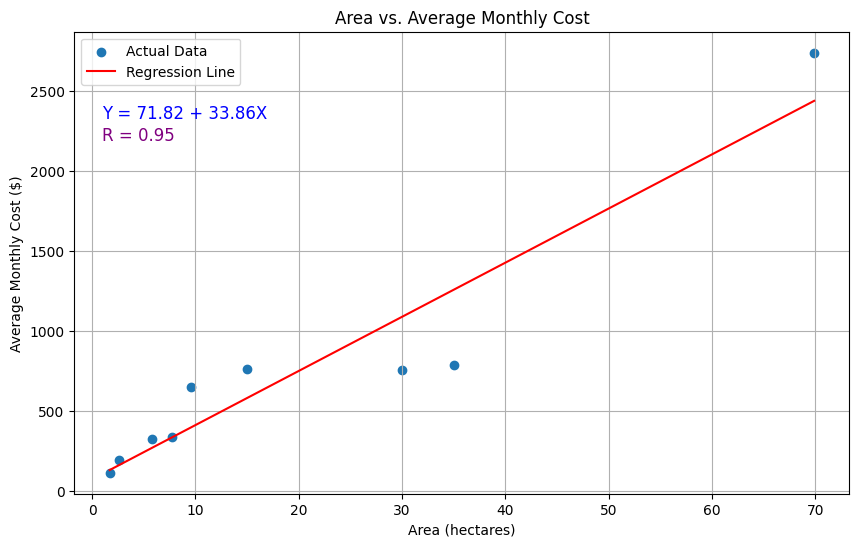

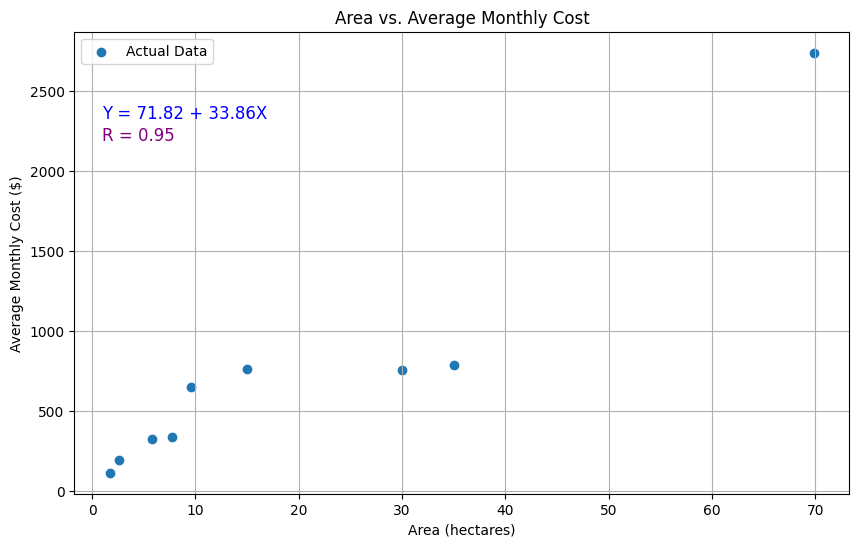

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats

def load_data(file_path, delimiter=';'):
    try:
        return pd.read_csv(file_path, delimiter=delimiter)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None

water_data = load_data('water_consumption_updated.csv')
area_data = load_data('Area.csv')    
    
def preprocess_area_data(area_data):
    area_data['Area'] = pd.to_numeric(area_data['Area'].str.replace(',', '.'), errors='coerce')
    return area_data

def calculate_monthly_consumption_and_cost(data):
    data['Consumption'] = pd.to_numeric(data['Consumption'].str.replace(',', '.'), errors='coerce')
    data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])
    data['YearMonth'] = data['Date'].dt.to_period('M')
    monthly_data = data.groupby(['Park', 'YearMonth'])['Consumption'].sum().reset_index()
    monthly_data['MonthlyCost'] = (monthly_data['Consumption'].clip(upper=1000) * 0.7) + (
        (monthly_data['Consumption'] - 1000).clip(lower=0) * 0.7 * 1.15
    )
    return monthly_data

def compute_average_monthly_cost(monthly_data):
    return monthly_data.groupby('Park')['MonthlyCost'].mean().reset_index().rename(columns={'MonthlyCost': 'AverageMonthlyCost'})

def merge_data(water_cost_data, area_data):
    area_data = preprocess_area_data(area_data)
    return pd.merge(water_cost_data, area_data, on='Park')

def train_linear_regression_model(X, y):
    model = LinearRegression()
    model.fit(X, y)
    return model

def calculate_r_squared(model, X, y):
    r_squared = model.score(X, y)
    print(f'Coefficient of Determination (R-squared): {r_squared:.2f}')
    return r_squared

def calculate_r_value(X, y):
    correlation_matrix = np.corrcoef(X.flatten(), y)
    r_value = correlation_matrix[0, 1]
    print(f'Correlation Coefficient (R-value): {r_value:.2f}')
    return r_value

def plot_data_and_regression_line(X, y, y_pred, model, r_value, show_line=True):
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, label='Actual Data')
    if show_line:
        plt.plot(X, y_pred, color='red', label='Regression Line')
    plt.xlabel('Area (hectares)')
    plt.ylabel('Average Monthly Cost ($)')
    plt.title('Area vs. Average Monthly Cost')
    plt.legend()
    plt.grid(True)

    equation = f'Y = {model.intercept_:.2f} + {model.coef_[0]:.2f}X'
    plt.text(1, max(y) * 0.85, equation, fontsize=12, color='blue')  
    plt.text(1, max(y) * 0.80, f'R = {r_value:.2f}', fontsize=12, color='purple')  
    plt.show()


def predict_new_park_cost_with_interval(model, new_area, X, y, confidence=0.95):
    new_area = np.array([[new_area]])
    predicted_cost = model.predict(new_area)
    n = len(X)
    mean_x = np.mean(X)
    se = np.sqrt((sum((y - model.predict(X))**2) / (n - 2)) * (1 + 1/n + (new_area - mean_x)**2 / sum((X - mean_x)**2)))
    t_value = stats.t.ppf((1 + confidence) / 2, n - 2)
    margin_of_error = t_value * se
    lower_bound = predicted_cost[0] - margin_of_error[0]
    upper_bound = predicted_cost[0] + margin_of_error[0]
    predicted_cost = predicted_cost.item()
    lower_bound = lower_bound.item()
    upper_bound = upper_bound.item()
    print(f'Predicted average monthly cost for a {new_area[0][0]}-hectare park: '
          f'{predicted_cost:.2f}€ (95% CI: [{lower_bound:.2f} ; {upper_bound:.2f}]€)')


if water_data is not None and area_data is not None:
    monthly_water_data = calculate_monthly_consumption_and_cost(water_data.copy())
    water_cost_data = compute_average_monthly_cost(monthly_water_data)
    merged_data = merge_data(water_cost_data, area_data)
    sorted_data = merged_data.sort_values(by='Area')
    X = sorted_data[['Area']].values.astype(float)
    y = sorted_data['AverageMonthlyCost'].values.astype(float)
    
    model = train_linear_regression_model(X, y)
    
    predict_new_park_cost_with_interval(model, 55, X, y)
    y_pred = model.predict(X)

    r_squared = calculate_r_squared(model, X, y)
    r_value = calculate_r_value(X, y)
    
    plot_data_and_regression_line(X, y, y_pred, model, r_value, show_line=True)

    plot_data_and_regression_line(X, y, y_pred, model, r_value, show_line=False) 

# Análise de Resultados: Consumo de Água e Custos em Parques

Este estudo analisa a relação entre a área de um parque e o seu custo médio mensal de água, utilizando técnicas de processamento de dados, regressão linear e visualização.

## Cálculo do Consumo e Custo Mensal de Água

O primeiro passo foi assegurar a consistência dos dados de consumo, convertendo-os para valores numéricos. Seguidamente, o consumo mensal de água foi calculado para cada parque, agrupando os dados por parque e mês. O custo mensal foi obtido multiplicando o consumo por 0,7 €/m³, sendo que para consumos acima de 1000 m³, foi aplicado um acréscimo de 15% ao custo, simulando variações tarifárias por volume.

## Modelo de Regressão Linear

Para modelar a relação entre a área do parque e o custo médio mensal de água, utilizámos um modelo de regressão linear simples. A regressão linear é um modelo estatístico baseado na relação linear, descrita por uma equação da reta, entre duas variáveis:

$$ Y = a + b X $$

Onde:

- $Y$ é a variável dependente 
- $X$ é a variável independente
- $a$ é o coeficiente linear
- $b$ é o coeficiente angular 

Neste caso, temos:

$X$ = Área do parque (em hectares)
$Y$ = Custo médio mensal de água (em €)

A ideia é encontrar os valores de $a$ e $b$ que melhor descrevem a relação linear entre $X$ e $Y$. Esta tarefa é realizada através do método dos mínimos quadrados, que minimiza a soma dos quadrados das diferenças entre os valores observados e os valores previstos pelo modelo.

Utilizámos o método de Pearson para obter os valores de $a$ e $b$, que não apresentamos aqui por questões de espaço, mas que podem ser encontrados nas fórmulas apresentadas.

Após determinar $a$ e $b$, podemos avaliar a qualidade do ajuste linear através de diversas métricas, como o coeficiente de correlação de Pearson $(r)$. Esta métrica mede o grau de correlação linear entre $X$ e $Y$, variando de -1 a 1. Quanto mais próximo de 1 (ou -1), mais forte é a correlação linear.

No texto, é mencionado que o coeficiente de correlação obtido foi 0,95, indicando uma forte correlação positiva de acordo com a escala de Pearson. Isto significa que o modelo de regressão linear é adequado para descrever a relação entre as variáveis em questão.

## Avaliação do Modelo

Para avaliar a qualidade do modelo, utilizámos o Coeficiente de Correlação $(R)$ e o Coeficiente de Determinação $(R^2)$.

**Coeficiente de Correlação $(R)$**: O valor de $R$ foi calculado utilizando o método de Pearson, que mede a força e direção da relação linear entre duas variáveis. O valor obtido foi $R = 0,95$, indicando uma forte correlação positiva entre a área do parque e o seu custo médio mensal de água. Isto significa que, à medida que a área do parque aumenta, o custo médio mensal de água também tende a aumentar.

**Coeficiente de Determinação $(R^2)$**: O $R^2$ mede a proporção da variabilidade na variável dependente (custo) que é explicada pela variável independente (área). O valor obtido foi $R^2 = 0,90$, o que significa que 90% da variabilidade nos custos mensais de água pode ser explicada pela área do parque. Este valor elevado de $R^2$ indica um ótimo ajuste do modelo aos dados.

## Previsão para um Novo Parque e Análise do Gráfico

Com o modelo de regressão linear treinado, realizámos uma previsão do custo médio mensal de água para um novo parque com 55 hectares. Para isso, utilizámos a equação da reta obtida pelo modelo:

$$ Y = 71,82 + 33,86X $$

Onde:

$Y$: representa o custo médio mensal de água (em €)
$X$: representa a área do parque (em hectares)

Substituindo $X$ por 55 (área do novo parque), obtivemos a previsão:

$$ Y = 71,82 + 33,86 * 55 = 1934,12 € $$

O gráfico de dispersão, que inclui a linha de regressão, ilustra esta relação. Podemos observar que a linha de regressão se ajusta bem aos dados, capturando a tendência geral de aumento do custo com o aumento da área. A equação da reta permite-nos prever o custo para qualquer área de parque dentro do intervalo de dados analisados.

No entanto, é importante considerar a incerteza associada a esta previsão. Para tal, calculámos um intervalo de 95% de confiança, que leva em consideração não só a variabilidade dos dados de treino, como também a incerteza associada ao modelo para uma nova área. O intervalo é calculado com base na distribuição t de Student, utilizando a fórmula:

$$ \text{interval} = \text{previsão} \pm t(n-2, 1-\alpha/2) * se $$

Onde:
- $n$ é o número de observações na amostra
- $\alpha$ é o nível de significância (1 - nível de confiança)
- $t(n-2, 1-\alpha/2)$ é o quantil da distribuição t de Student com $n-2$ graus e probabilidade acumulada $1-\alpha/2$
- $se$ é o erro padrão da previsão

O erro padrão da previsão $se$ é calculado como:

$$ se = \sqrt{\left(\frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{n - 2}\right) \left(1 + \frac{1}{n} + \frac{(x_0 - \bar{x})^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2}\right)} $$

Onde:
- $y_i$ são os valores observados
- $\hat{y}_i$ são os valores previstos pelo modelo
- $x_0$ é a nova área (55 hectares)
- $\bar{x}$ é a média das áreas na amostra de treino

Aplicando esta fórmula, obtivemos o seguinte intervalo de predição de 95%:

**95% CI: [1159,59 ; 2708,74] €**

Este intervalo indica que temos 95% de confiança de que o custo real do novo parque com 55 hectares estará entre 1159,59 € e 2708,74 €. A amplitude do intervalo reflete a variabilidade nos dados e a incerteza inerente à extrapolação do modelo para uma área fora do intervalo de dados original. Quanto mais distante da média dos dados de treino estiver a nova área, maior será a incerteza e, consequentemente, maior será a amplitude do intervalo de predição.

## Ajuste Linear e Possíveis Melhorias

Embora o modelo apresente um bom ajuste geral aos dados, a análise visual do gráfico sugere que pode haver um ligeiro padrão não linear na relação entre a área e o custo.


## Conclusão

A aplicação da técnica de regressão linear simples neste estudo revelou uma correlação robusta e estatisticamente significativa entre a área de um parque e o seu respetivo custo médio mensal de água. O elevado coeficiente de correlação de Pearson $(R = 0,95)$ indica uma forte associação positiva entre estas duas variáveis, sugerindo que um aumento na área do parque tende a resultar num aumento proporcional no custo médio mensal de água.

Além disso, o coeficiente de determinação $(R^2 = 0,90)$ demonstra que o modelo de regressão linear explica 90% da variabilidade observada nos custos mensais de água, o que é considerado um ajustamento excelente. Este resultado reforça a capacidade preditiva do modelo e a sua utilidade na estimativa de custos para novos parques, com base na sua área projetada.

A previsão realizada para um novo parque com 55 hectares, utilizando a equação da reta obtida pelo modelo $(y = 71,82 + 33,86x)$, resultou num custo médio mensal estimado de 1934,12 €. No entanto, é crucial reconhecer a incerteza desta previsão, refletida no intervalo de confiança de 95% calculado (1159,59 € - 2708,74 €), que oferece uma margem bastante elevada


# US016 - Introdução

Na US16, o objetivo é aplicar a regressão polinomial para determinar a melhor curva que se ajusta aos dados de tempo de execução em função do tamanho da entrada. A análise busca entender o comportamento do tempo de execução do algoritmo conforme o tamanho da entrada varia, utilizando os dados fornecidos na US14. Utilizaremos uma abordagem matemática detalhada para modelar essa relação e interpretar os resultados obtidos.

## Formulação Matemática

### Regressão Polinomial

A regressão polinomial é uma extensão da regressão linear que permite modelar a relação entre a variável independente \( x \) e a variável dependente \( y \) como um polinômio de grau \( d \). A equação geral para uma regressão polinomial de grau \( d \) é dada por:

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \cdots + \beta_d x^d
$$

onde:

- \( y \) é a variável dependente (tempo de execução).
- \( x \) é a variável independente (tamanho da entrada).
- \( \beta_0, \beta_1, \beta_2, ... \) são os coeficientes do modelo.

### Metodologia

Para ajustar o modelo de regressão polinomial aos dados, seguimos os seguintes passos:

1. **Preparar os dados**: Extração das variáveis independentes e dependentes.
2. **Criar características polinomiais**: Geração de novas características usando o PolynomialFeatures da biblioteca scikit-learn.
3. **Ajustar o modelo**: Treinamento de um modelo de regressão linear utilizando as características polinomiais.
4. **Predição e Avaliação**: Predição dos valores utilizando o modelo ajustado e avaliação da performance do modelo usando métricas como o coeficiente de determinação \( R^2 \) e a soma dos quadrados dos resíduos (SQE).

##### Fórmulas Utilizadas para cálcular o coeficiente de determinação \( R^2 \) e a soma dos quadrados dos resíduos (SQE):

O coeficiente de determinação \( R^2 \) é uma medida estatística que indica a proporção da variabilidade dos dados que é explicada pelo modelo ajustado. Para obtermos este valor precisamos primeiro de calcular o coeficiente de correlação amostral de Pearson. Este é calculado como:

$$
r = \frac{S_{xy}}{\sqrt{S_{xx} \times S_{yy}}}
$$

Em que :

$$
S_{xx} = \sum_{i=1}^n (x_i - \bar{x})^2, \quad S_{yy} = \sum_{i=1}^n (y_i - \bar{y})^2 \quad \text{e} \quad S_{xy} = \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})
$$

Depois , para obtermos o coeficiente de determinação , apenas temos que elevar o anterior coeficiente ao quadrado da seguinte forma:

$$
r^2 = \left( \frac{S_{xy}}{\sqrt{S_{xx} \times S_{yy}}} \right)^2
$$


O erro quadrático médio (SQE) é uma medida que indica a diferença entre os valores observados e os valores previstos pelo modelo. É calculado como a soma dos quadrados das diferenças entre os valores observados \( y_i \) e os valores previstos \( \hat{y}_i \) para cada observação \( i \) . A fórmula utilizada é dada por:

$$
\text{sqe} = \sum_{i=1}^n (y_i - \hat{y}_i)^2 = S_{yy} - \frac{S_{xy}^2}{S_{xx}}
$$


## Implementação 

### Carga e Preparação dos Dados

Os dados foram carregados a partir do arquivo "saida.csv", que contém as colunas `TamanhoEntrada` e `TempoExecucao(ms)`. O arquivo é formatado da seguinte maneira:






```csv
TamanhoEntrada;TempoExecucao(ms)
570;7
1150;12
1730;10
2310;15
2890;23
3470;33
4050;47
4630;69
5210;72
5790;99
6370;125
6950;153
7530;202
8110;237
8690;259
9270;305
9850;306
10430;357
11010;406
11590;470
12170;509
12750;564
13330;605
13910;679
14490;686
15070;793
15650;892
16230;917
16810;1042
17390;1109


```


 
Extraímos as variáveis independentes \( X \) e dependentes \( y \).

### Criação de Características Polinomiais e Ajuste do Modelo

Utilizamos um polinômio de grau 3 para criar novas características e ajustamos um modelo de regressão linear a esses dados.

### Avaliação do Modelo

Calculamos a soma dos quadrados dos resíduos (SQE) e o coeficiente de determinação \( R^2 \). A SQE foi obtido somando os quadrados das diferenças entre os valores observados e os valores previstos. O \( R^2 \) foi calculado como a proporção da variabilidade dos dados que é explicada pelo modelo ajustado.

### Coeficientes do Modelo

Os coeficientes do modelo polinomial foram extraídos e exibidos. Estes coeficientes incluem o intercepto (\( \beta_0 \)) e os coeficientes dos termos de \( x \) (\( \beta_1 \)), \( x^2 \) (\( \beta_2 \)), e \( x^3 \) (\( \beta_3 \)).

### Equação do Modelo

A equação completa do modelo é construída com base nos coeficientes obtidos:

$$
TempoExecucao = 15.027583033880319 - 0.008186740032391296 \cdot TamanhoEntrada + 4.0178240766567025 \cdot 10^{-6} \cdot TamanhoEntrada^2
$$


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

file_path = 'saida.csv'
df = pd.read_csv(file_path, delimiter=';')

input_column = 'TamanhoEntrada'
output_column = 'TempoExecucao(ms)'

X = df[[input_column]].values
y = df[output_column].values

degree = 2

poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_poly_pred = model.predict(X_poly)

sqe = np.sum((y - y_poly_pred) ** 2)

r_squared = model.score(X_poly, y)

print(f'Intercept (β0): {model.intercept_}')
print(f'Coefficient for x (β1): {model.coef_[1]}')
print(f'Coefficient for x^2 (β2): {model.coef_[2]}')
print(f'Coefficient of determination (r^2): {r_squared}')
print(f'Sum of Squared Errors (SQE): {sqe}')

equation = f'{model.intercept_}'
for i in range(1, degree+1):
    equation += f' + {model.coef_[i]}*x^{i}'
print(f'Complete Polynomial Regression: {equation}')


plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_poly_pred, color='red', label='Polynomial Fit')
plt.xlabel(input_column)
plt.ylabel(output_column)
plt.title(f'Polynomial Regression (degree={degree})')
plt.legend()
plt.show()


# Análise de Resultados

## Resultados

Os resultados obtidos foram:

$$
\beta_0 = 15.027583033880319
$$

$$
\beta_1 = -0.008186740032391296
$$

$$
\beta_2 = 4.0178240766567025 \cdot 10^{-6}
$$

$$
R^2 = 0.997
$$

$$
SQE = 7884.592946527897

$$

A equação do modelo resultante foi:

$$
TempoExecucao = 15.027583033880319 - 0.008186740032391296 \cdot TamanhoEntrada + 4.0178240766567025 \cdot 10^{-6} \cdot TamanhoEntrada^2
$$


#### Análise dos Coeficientes r e R^2
 
###### Coeficiente de Determinação r^2
O valor de \( R^2 = 0.997 \) é extremamente alto. \( R^2 \) mede a proporção da variação total da variável dependente que é explicada pelo modelo de regressão. Um \( R^2 \) de 0.997 indica que 99.7% da variabilidade nos dados do tempo de execução pode ser explicada pelo tamanho da entrada através do modelo polinomial de grau 2. Isto sugere que o modelo ajusta-se muito bem aos dados, deixando apenas 0.3% da variabilidade por explicar.

###### Coeficiente de Correlação amostral de Pearson r
Embora o valor específico de \( r \) não tenha sido diretamente fornecido nos resultados, sabemos que \( R^2 \) é o quadrado do coeficiente de correlação de Pearson \( r \) no contexto de uma regressão linear simples. Portanto, podemos inferir que o valor de \( r \) associado a esse \( R^2 \) seria próximo de:

$$
r = \sqrt{R^2} = \sqrt{0.997} \approx 0.9985
$$

Este valor de \( r = 0.9985 \) indica uma correlação extremamente forte entre o tamanho da entrada e o tempo de execução. Conforme a tabela de interpretação dos coeficientes de correlação de Pearson , um \( r \) nesta faixa (próximo de 1) corresponde a uma "correlação forte positiva", sugerindo que à medida que o tamanho da entrada aumenta, o tempo de execução também aumenta de maneira muito consistente.
Para além disto , pode-se também afirmar que se trata de uma associação linear positiva entre as 2 variáveis pelo facto de que r>0.

## Análise Gráfica

O gráfico gerado pela análise de regressão polinomial de grau 2 mostra a relação entre o tamanho da entrada e o tempo de execução. Os pontos azuis representam os dados reais, enquanto a linha vermelha representa a curva ajustada pelo modelo polinomial. Podemos observar que a curva ajustada segue de perto os dados reais, indicando que o modelo se ajusta bem aos dados. O aumento acentuado do tempo de execução com o aumento do tamanho da entrada é capturado pela curvatura da linha de ajuste, confirmando a eficácia do modelo polinomial de grau 2 em explicar a variabilidade dos dados.


## Conclusão

A análise realizada utilizando regressão polinomial de grau 2 mostra que o modelo se ajusta bem aos dados de tempo de execução em função do tamanho da entrada, com um coeficiente de determinação \( R^2 \) de 0.997, indicando que o modelo explica 99.7% da variabilidade dos dados. Os coeficientes obtidos fornecem uma compreensão detalhada de como o tempo de execução varia com o tamanho da entrada, com termos quadráticos e cúbicos contribuindo significativamente para a curvatura da relação.

Este modelo é útil para prever o tempo de execução do algoritmo para diferentes tamanhos de entrada, proporcionando uma ferramenta valiosa para analisar o desempenho do algoritmo e otimizar seu uso em diferentes cenários. A visualização gráfica confirma que a curva ajustada pelo modelo segue de perto os dados reais, validando a eficácia da abordagem de regressão polinomial de grau 2.

## Auto-Avaliação 

Pedro Natário (1230731) - 28%

João Carlos (1230706) - 28%

Luís Barros (1230711) - 28%

Gonçalo Areias (1231174) - 16%